# Data Analysis of Superstore Dataset

Objectives :
1) Clean and Transform the dataset
2) Perform Exploratory Data Analysis
3) Find the analysis problem
4) Analysis a solution with visualization

### 1. Importing the required packages and the dataset

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### 2. Data Inspection

In [4]:
# Show the dataset
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [5]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
# Describe the dataset
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### 3. Data Cleaning

In [7]:
# Delete the identical Rows 
df.drop_duplicates(keep='first',inplace=True)
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [8]:
# Shape of dateset
df.shape

(9977, 13)

### 4. Exploratory data Analysis

4.1 What are total Sales and Profit ?

In [9]:
Sale_and_Profit = df.groupby("Segment").sum().iloc[:,[1,-1]].sum()
round(Sale_and_Profit,2) # Rounding Numericala entries to 2 decimal places

C:\Users\hrishabh\AppData\Local\Temp\ipykernel_3584\322190754.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Sale_and_Profit = df.groupby("Segment").sum().iloc[:,[1,-1]].sum()


Sales     2296195.59
Profit     286241.42
dtype: float64

* Total Sale : $ 2296195.59
* Total Profit : $ 286241.42

4.2 Which 10 states has maximum Sales and Profit

In [10]:
TopSales = df.groupby("State").Sales.sum().nlargest(n =10)
TopProfits = df.groupby("State").Profit.sum().nlargest(n=10)

TopSales,TopProfits

(State
 California      457576.2715
 New York        310827.1510
 Texas           170124.5418
 Washington      138560.8100
 Pennsylvania    116496.3620
 Florida          89473.7080
 Illinois         80162.5370
 Ohio             77976.7640
 Michigan         75879.6440
 Virginia         70636.7200
 Name: Sales, dtype: float64,
 State
 California    76330.7891
 New York      74015.4622
 Washington    33368.2375
 Michigan      24428.0903
 Virginia      18597.9504
 Indiana       18382.9363
 Georgia       16250.0433
 Kentucky      11199.6966
 Minnesota     10823.1874
 Delaware       9977.3748
 Name: Profit, dtype: float64)

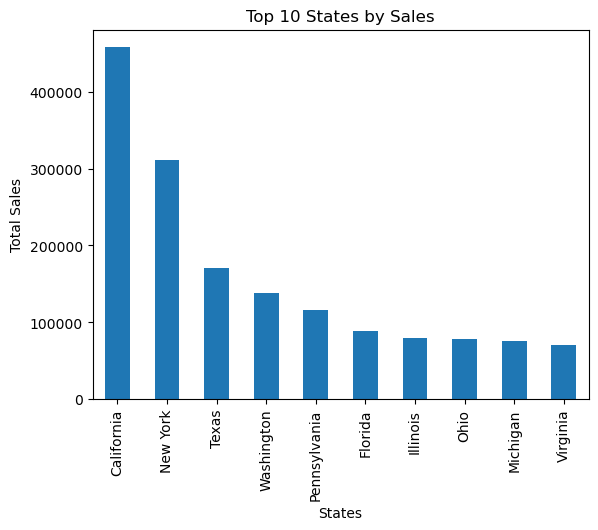

In [11]:
# Create Visualization for Top sales
TopSales.plot(kind='bar')
plt.xlabel("States")
plt.ylabel("Total Sales")
plt.title("Top 10 States by Sales")
plt.show()

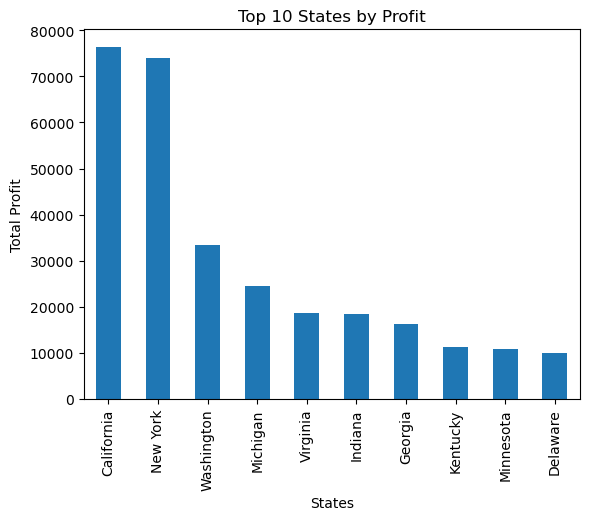

In [12]:
# Create Visualization for Top Profit
TopProfits.plot(kind='bar')
plt.xlabel("States")
plt.ylabel("Total Profit")
plt.title("Top 10 States by Profit")
plt.show()

California and New York has both max profit and max sales

4.3 Checking relation amoung financial data

In [13]:
Finance_data = df.loc[:,['Sales','Quantity','Discount','Profit']]
Finance_data

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164
...,...,...,...,...
9989,25.2480,3,0.20,4.1028
9990,91.9600,2,0.00,15.6332
9991,258.5760,2,0.20,19.3932
9992,29.6000,4,0.00,13.3200


<Axes: >

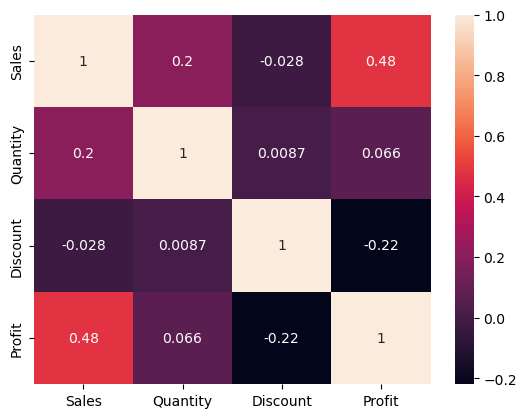

In [14]:
# Checking correlation
Corr = Finance_data.corr()
sns.heatmap(Corr,xticklabels=Corr.columns,yticklabels=Corr.columns,annot=True)

From the above map it is proved that 
* Sales and profit are positively correlated
* Discount and profits are negatively related

#### Checking how discount affects sales and profit

#### Case 1 : If discount = 0

C:\Users\hrishabh\AppData\Local\Temp\ipykernel_3584\2470033175.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data_zero_discount.corr()


Text(0.5, 1.0, 'When no discount')

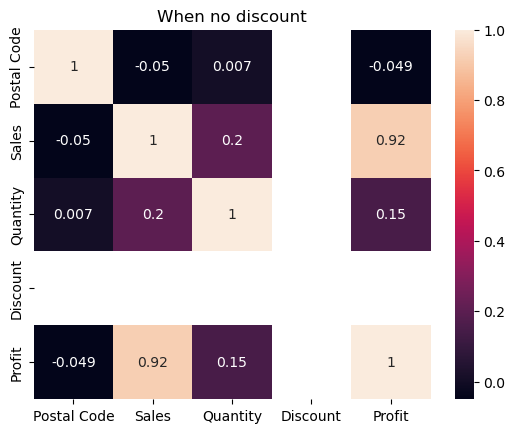

In [15]:
data_zero_discount=df[df['Discount']==0]
correlation = data_zero_discount.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)
plt.title('When no discount')

There is a 0.92 correlation index between sales and profit which shows they are highly correlated

<Axes: xlabel='Sales', ylabel='Profit'>

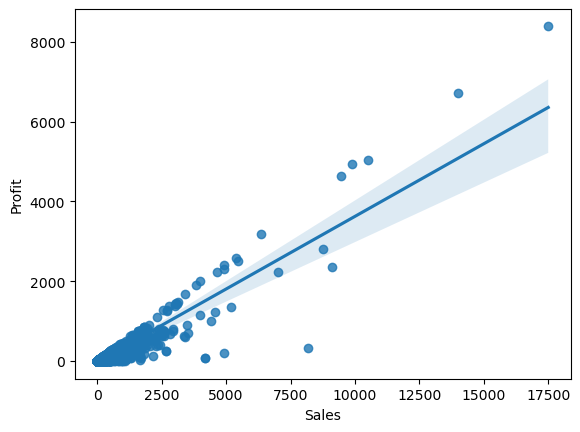

In [16]:
# Regression Plot 
sns.regplot(x='Sales',y='Profit', data=data_zero_discount)

This graph clearly shows that if sales increase profit also increase

#### Case 2 : When discount is given(Not zero)

Text(0.5, 1.0, 'How Discount affect Sales and Profit')

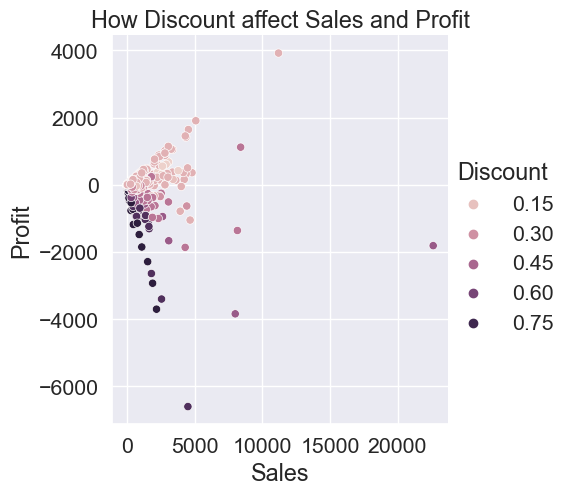

In [26]:
data_with_discount=df[df['Discount']!=0]
sns.relplot(x='Sales',y='Profit',hue='Discount',data=data_with_discount)
plt.title("How Discount affect Sales and Profit")

In above graph, we can conclude that as percentages of Discount increases the sales is also goes increases but profit decreases

C:\Users\hrishabh\AppData\Local\Temp\ipykernel_3584\2379509376.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=data_with_discount.corr()


Text(0.5, 1.0, 'When discount is given')

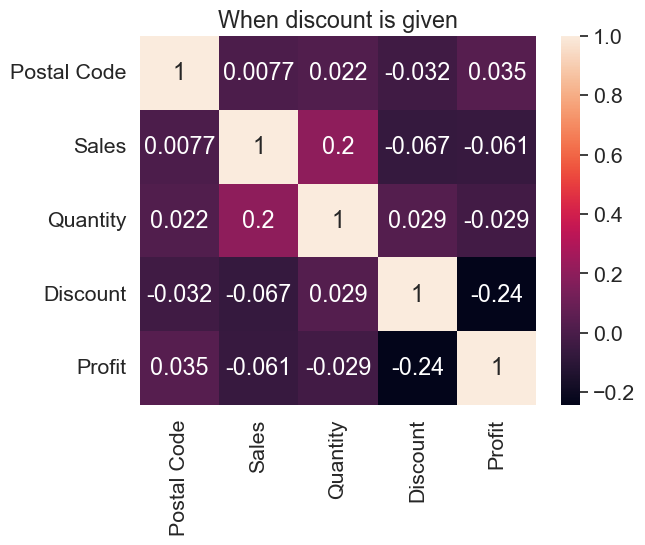

In [35]:
#relation analysis
correlation=data_with_discount.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)
plt.title("When discount is given")

Profit and Sales are negetively related here when discount is not zero

### Checking for all subcategories

Copiers have maximum profit and Machines have least profit

Text(0.5, 1.0, 'Sales and Profit for sub-category')

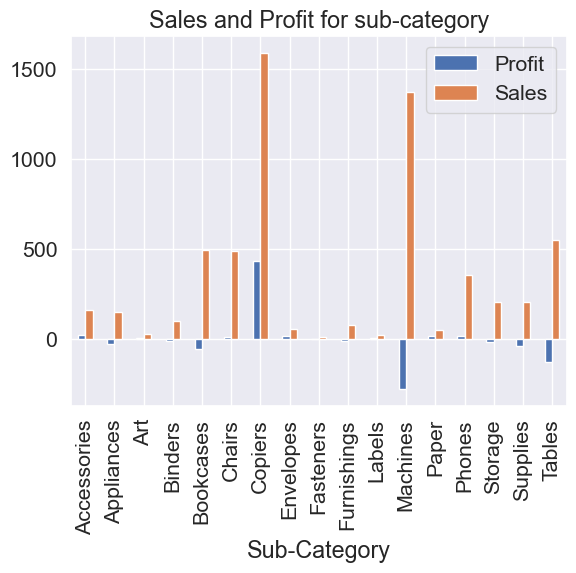

In [28]:
# Combining the multiple graphs together for a barplot
Subcategories=pd.pivot_table(data_with_discount,index='Sub-Category',values=['Profit','Sales'])
Subcategories.plot(kind='bar')
plt.title("Sales and Profit for sub-category")

Text(0.5, 1.0, 'Dicount for subcategory')

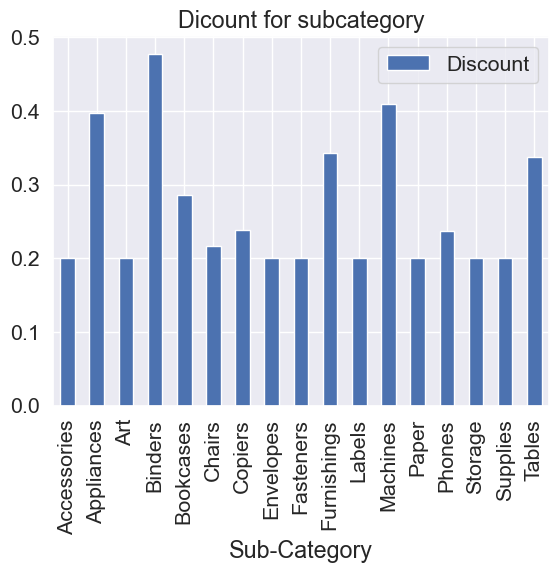

In [29]:
Subcategories_discount=pd.pivot_table(data_with_discount,index='Sub-Category',values='Discount')
Subcategories_discount.plot(kind='bar')
plt.title("Dicount for subcategory")

Machines have maximum sales but least profit because it has the second highest value of discount

#### 4.4 Profit in various regions

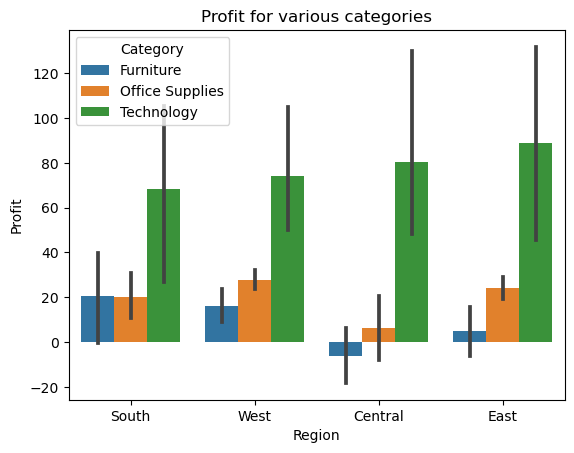

In [21]:
plt.title("Profit for various categories")
sns.barplot(data = df , x = "Region",y = "Profit" ,hue = "Category")
plt.show()

Furniture in the central region is the only point with a loss


#### 4.5 Checking the reason for losses in Furniture category in the Central region

In [22]:
# Grouping Data by Region and only slicing Data for Central Region 
Data_Central = list(df.groupby("Region"))[0][1]

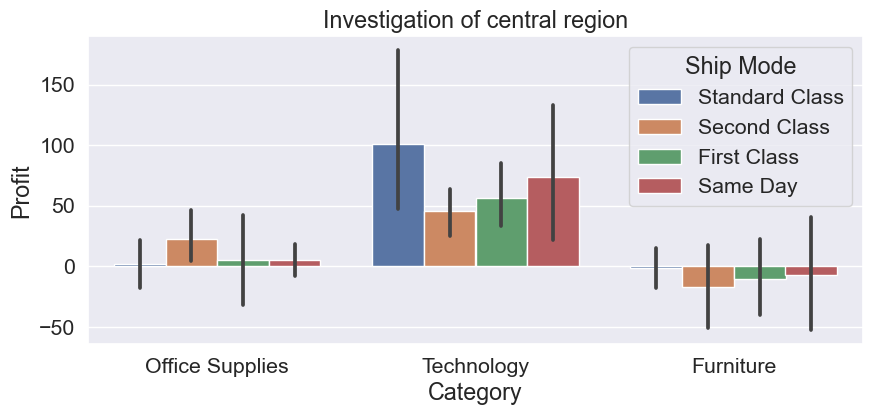

In [38]:
plt.figure(figsize=(10,4))
sns.barplot(data = Data_Central, x = "Category",y = "Profit" ,hue = "Ship Mode")
plt.title("Investigation of central region")
plt.show()

Losses in central region is not dependent on the shipping method

In [24]:
# Checking correlation
# Slicing Furniture Data for central region
gb_Category_Furniture =list(list(df.groupby("Region"))[0][1].groupby("Category"))[0][1]

C:\Users\hrishabh\AppData\Local\Temp\ipykernel_3584\4207703415.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(gb_Category_Furniture.corr() , annot = True)


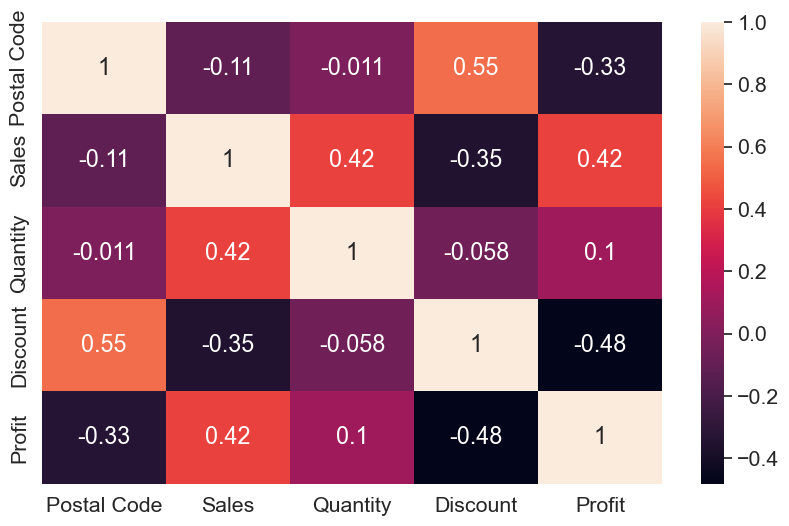

In [36]:
# Creating heatmap
plt.figure(figsize = (10,6))
sns.heatmap(gb_Category_Furniture.corr() , annot = True)
plt.show()

* There is a negative correlation between sales and discount
* This proves that giving more discount does not increase sales


## 5.Total observation from EDA

#### What are total sales and profit?
* Total Sales = 2,296,195.56 USD
* Total Profit = 286,241.42 USD

#### Top 10 States by Sales and Profits
* Top sales
'California', 'New York', 'Texas', 'Washington', 'Pennsylvania','Florida', 'Illinois', 'Ohio', 'Michigan', 'Virginia' 

* Top Profit : 'California', 'New York', 'Washington', 'Michigan', 'Virginia','Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware'

* California and New York are the 2 highest in both sales and profit

#### How does discount affect profit and Sales
 * When Discount = 0 sales and profit are postively correlated which shows that profit increases with sale
 * When Discount is not 0 , sales and profit are negetively correlation which shows profit decreases with increase in sales
 * As the discount amount increases the sales increases but profit decreases for overall cases

#### Checking for all Sub-Categories
* For Machines the sales is high but the profit is least (-ve) , the reason is: discount is second highest for this category
* This proves that giving heavy discount decreases the profit to a great extent

#### Checking for all regions
* The only region with a -ve profit product is central region and the product is furniture
* All the shipping modes produces the -ve profit in this case
* Using heatmap it is proved that sales and profit are negetively correlated with discount, so increasing discount is decreasing both sales and profit

### Final Insights from the Analysis
1. If we give more discount sale may increase in some of the cases but the profit will decrease
2. In Technology products we get more profit because the discount is less
2. In Sub-categories Machines are having the least profit because it has the second highest discount
4. In some of the cases the discount negatively affects both sales and profit(like furniture in central region)
5. To increase profits we need to increase sales in 'Fasteners','labels'and 'Art' category which are very weak.
6. To increase profit we need to sell more to the states which are liking our products like California and New York


Hence to increase profit concentrate on increaing sales in the weaker sections rather than giving high discount on products.